In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train_na = train.replace(-1, np.NaN)
 
na = train.copy()
na[na!=-1]=int(0)
na[na==-1]=int(1)
 
n = len(train.columns)
N = train.shape[0]
null_per = {}
#for column in train:
 #       null_per[column] = train[column].sum() * 100 / N

In [5]:
na[na==1].sum()
for column in na:
    if na[column].sum() != 0:
        print(column,":",na[column].sum())

ps_ind_02_cat : 216
ps_ind_04_cat : 83
ps_ind_05_cat : 5809
ps_reg_03 : 107772.0
ps_car_01_cat : 107
ps_car_02_cat : 5
ps_car_03_cat : 411231
ps_car_05_cat : 266551
ps_car_07_cat : 11489
ps_car_09_cat : 569
ps_car_11 : 5
ps_car_12 : 1.0
ps_car_14 : 42620.0


Missing values for Train dataset
{'ps_car_12': 0.000168007365442901, 'ps_car_01_cat': 0.01797678810239041, 'ps_ind_04_cat': 0.013944611331760785, 'ps_car_07_cat': 1.9302366215734899, 'ps_car_02_cat': 0.0008400368272145051, 'ps_ind_05_cat': 0.975954785857812, 'ps_car_09_cat': 0.09559619093701067, 'ps_car_11': 0.0008400368272145051, 'ps_car_03_cat': 69.08983689844963, 'ps_car_05_cat': 44.78253126617071, 'ps_reg_03': 18.106489788512327, 'ps_ind_02_cat': 0.03628959093566662, 'ps_car_14': 7.160473915176441}


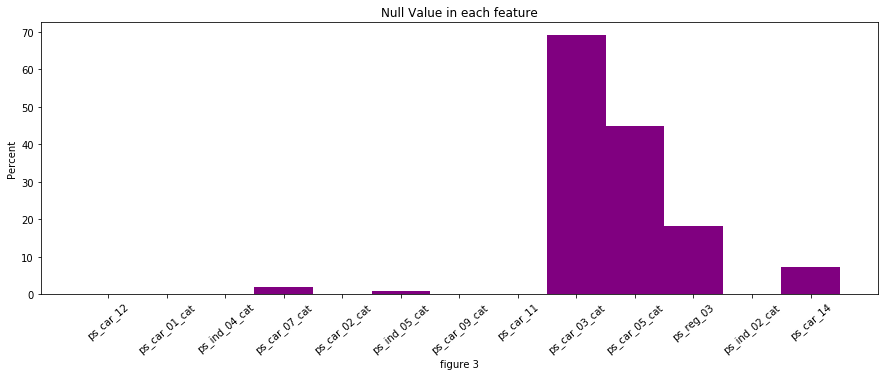

In [6]:
print("Missing values for Train dataset")
null_per = {}
N = na.shape[0]
for column in na:
    null_per[column] = na[column].sum() * 100 / N

null_per = dict(filter(lambda x: x[1] != 0, null_per.items()))
print(null_per)
plt.figure(figsize=(15,5)) 
    #ax.set_xticklabels(xlabels, rotation=40)
plt.bar(range(len(null_per)), null_per.values(),width=1,facecolor = 'purple')
plt.ylabel('Percent')
plt.xticks(range(len(null_per)), null_per.keys(), rotation=40)
plt.title('Null Value in each feature')
#font = {'family' : 'serif',  
 #       'color'  : 'darkred',  
  #      'weight' : 'normal',  
   #     'size'   : 20,  
    #    }  
plt.xlabel('figure 3')
plt.show()
    

In [9]:
all_features = train.columns.tolist()
#all_features.remove('target')
binary_features = [x for x in all_features if x[-3:]=='bin']
binary_features.append('target') 
binary_features
bina = binary_features[-4:]
bina

['ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'target']

In [10]:
train.loc[train['target']==0,'target'] = 'Not Filed'
train.loc[train['target']==1,'target'] = 'Filed'
#sns.barplot(y="target",data=train['target'],  palette="Reds_d");
sns.barplot(train.target,palette="Reds_d");
plt.xlabel('Weather Filed Claim');
plt.ylabel('Number of occurrences');
plt.show()

KeyboardInterrupt: 

In [ ]:
train.loc[1:10,'ps_car_03_cat'].head()

In [ ]:
all_features = train.columns.tolist()
binary = [x for x in all_features if x[-3:]=='bin' ]
binary = ['target']+binary
bin_data = train[binary]
sns.pairplot(bin_data, hue="target")


In [ ]:
for col in binary:
    sns.countplot(train[col])

In [ ]:
a = train.dtypes
sns.set_style('white',{"axes.facecolor": "1"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.5})
plt.figure(figsize=(6,4))
plt.title('The data type')
sns.countplot(a,palette = 'Greens_d')
plt.xlabel('figure 1')

plt.show()

In [ ]:
N = 2
zero = []
one = []
for col in binary:
    zero.append(train[col].sum())
    n = train.shape[0]-train[col].sum()
    one.append(n)

In [ ]:
ind = binary    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
f,ax = plt.subplots(figsize=(22,8)) 
#plt.figure(figsize=(22,8))

p1 = plt.bar(ind, zero, width,color='purple')
p2 = plt.bar(ind, one, width,bottom = zero,color='orange')

plt.ylabel('binary')
plt.title('Binary data Visulation')

xticks=range(0,len(ind))
xlabels=[index for index in ind]
ax.set_xticks(ind,(ind))
ax.set_xticklabels(xlabels, rotation=40)
ax.set_yticks(np.arange(0, train.shape[0],100000))
plt.legend((p1[0], p2[0]), ('0', '1'))
plt.xlabel('figure 4')

plt.show()



In [ ]:
cal = [x for x in all_features if x[-3:]=='cat' ]
cal = ['target']+cal
train_filed = train.loc[train['target']==1,:]
cal

In [ ]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [ ]:
meta

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
width = 0.5
for f in v:
    plt.figure()
    f, ax = plt.subplots(figsize=(6,4))
    # Calculate the percentage of target=1 per category value
    percentage = train[[f, 'target']].groupby([f],as_index=False).mean()
    percentage.sort_values(by='target', ascending=False, inplace=True)
    
    
    sns.barplot(ax=ax, x=f, y='target', data=percentage,palette = 'Reds_d', order=percentage[f])
    #sns.distplot(cat_perc,color='red')
    plt.ylabel('Percentage of filed', fontsize=15)
    plt.xlabel(f, fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
train_num = train.loc[:,numeric_features]

In [ ]:
xlabels = [index for index in numeric_features]

f,ax = plt.subplots(figsize=(20,20)) 
colormap = plt.cm.YlOrRd

sns.heatmap(train_num.corr(),linewidths=0.05,vmax=0.5, square=True,cmap=colormap, linecolor='white', annot=False)

ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.xlabel('figure 7')
plt.show()

In [ ]:
plt.figsize=(8,6)
train['target_name'] = train['target'].map({0: 'Not Filed', 1: 'Filed'})
sns.countplot(train.target_name,palette = 'Blues_d');
plt.xlabel('Figure 2 ');
plt.ylabel('The cumulated number');
plt.title('The \'target\' column')
plt.show()